In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf, grangercausalitytests

# Load the dataset
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'
ts = data['#Passengers']


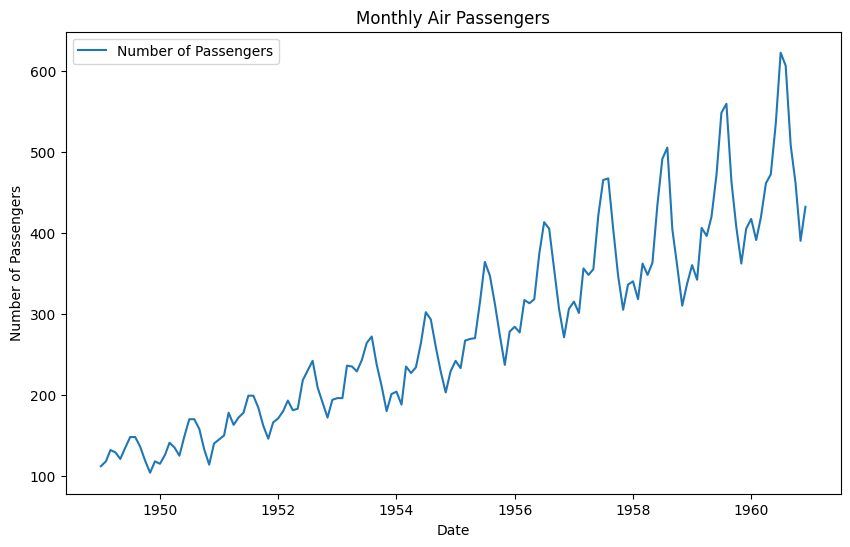

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Number of Passengers')
plt.title('Monthly Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


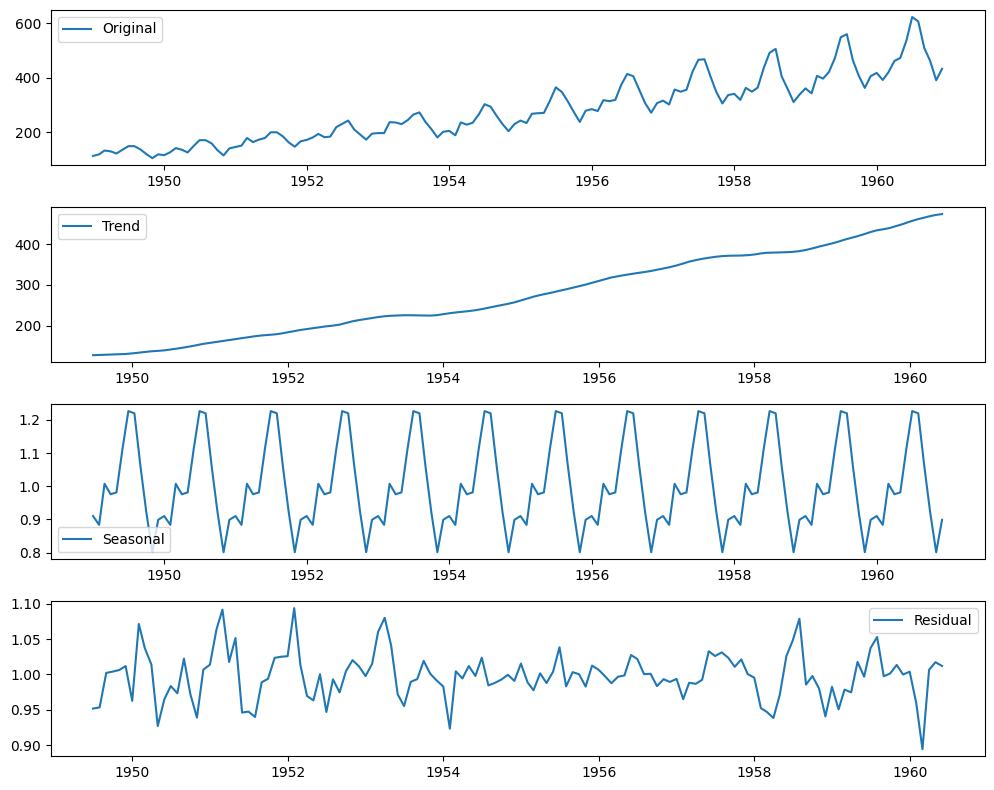

In [3]:
decomposition = seasonal_decompose(ts, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [4]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print("Original Time Series")
test_stationarity(ts)


Original Time Series
ADF Statistic: 0.8153688792060441
p-value: 0.9918802434376409
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


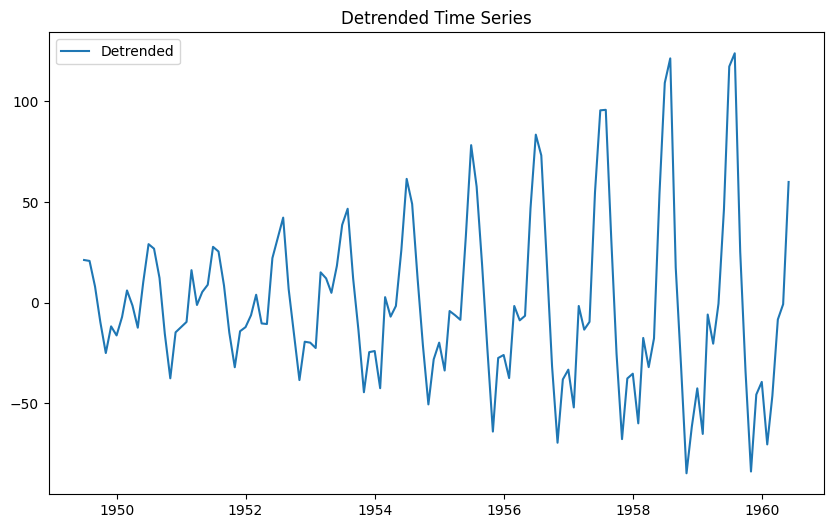

Detrended Time Series
ADF Statistic: -4.699799031853892
p-value: 8.422596052725326e-05
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


In [5]:
ts_detrended = ts - trend

plt.figure(figsize=(10, 6))
plt.plot(ts_detrended, label='Detrended')
plt.title('Detrended Time Series')
plt.legend()
plt.show()

print("Detrended Time Series")
test_stationarity(ts_detrended.dropna())


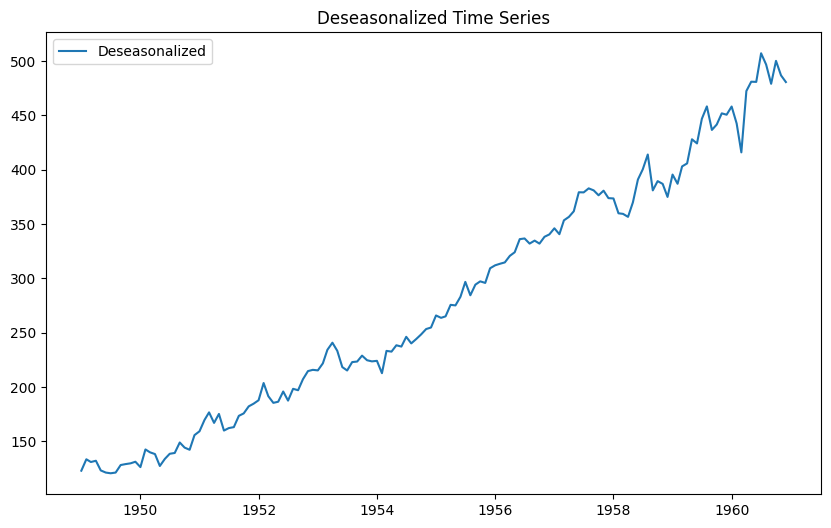

Deseasonalized Time Series
ADF Statistic: 1.144106941143684
p-value: 0.9955760226610061
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [6]:
ts_deseasonalized = ts / seasonal

plt.figure(figsize=(10, 6))
plt.plot(ts_deseasonalized, label='Deseasonalized')
plt.title('Deseasonalized Time Series')
plt.legend()
plt.show()

print("Deseasonalized Time Series")
test_stationarity(ts_deseasonalized.dropna())


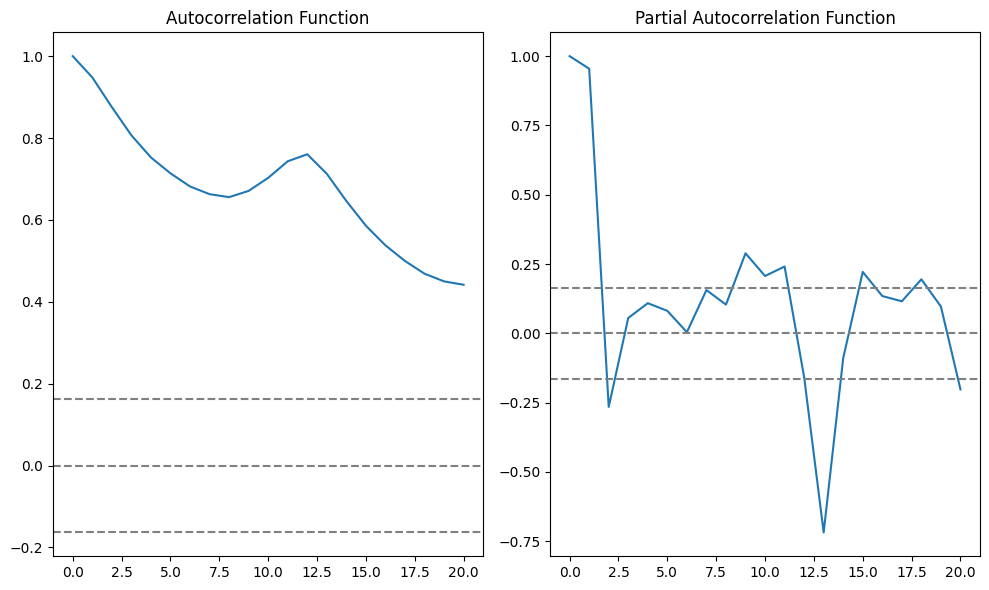

In [7]:
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20)

plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()


In [8]:
# For demonstration, let's assume we have another time series that could causally influence the passengers
# For the sake of this example, we'll create a synthetic related series
np.random.seed(42)
synthetic_series = ts + np.random.normal(scale=10, size=len(ts))

df = pd.DataFrame({'Passengers': ts, 'SyntheticSeries': synthetic_series})
max_lag = 12
test_result = grangercausalitytests(df[['Passengers', 'SyntheticSeries']], max_lag)

# The Granger Causality Test results will be printed automatically by the function



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8989  , p=0.3447  , df_denom=140, df_num=1
ssr based chi2 test:   chi2=0.9182  , p=0.3379  , df=1
likelihood ratio test: chi2=0.9153  , p=0.3387  , df=1
parameter F test:         F=0.8989  , p=0.3447  , df_denom=140, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3240  , p=0.7238  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=0.6716  , p=0.7148  , df=2
likelihood ratio test: chi2=0.6700  , p=0.7153  , df=2
parameter F test:         F=0.3240  , p=0.7238  , df_denom=137, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0898  , p=0.3558  , df_denom=134, df_num=3
ssr based chi2 test:   chi2=3.4401  , p=0.3286  , df=3
likelihood ratio test: chi2=3.3988  , p=0.3341  , df=3
parameter F test:         F=1.0898  , p=0.3558  , df_denom=134, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7583  , p=0.5543  